In [1]:
from Model_Builder import *

In [2]:
import matplotlib.pyplot as plt
from statistics import mean
from scipy import stats
from pandas.plotting import table
from matplotlib.pyplot import figure

In [3]:
lrp = LRP()

In [4]:
lrp

In [5]:
# Input from Facility Location Model
lrp.DC_cfg(
    DC_N = 1,
    customer_N = 300,
    fixed_cost_factor = 0.08,
    avg_basket_size = 80,
    capacity_DC=[15000],
    varCost_DC =[0.287,0.3,0.3,0.3,0.3],
    lat_DC =[49.785592, 49.773391, 49.800460, 49.811422, 49.791321],
    lon_DC=[9.930666, 9.923226, 9.951607, 9.981127, 9.953342],
    osmid =[27489160, 30747843, 40430241, 27352149, 27457548])

fixed_cost_DC  capacity_DC  varCost_DC        lat       lon     osmid
DC_ID                                                                       
DC1           1920.0        15000       0.287  49.785592  9.930666  27489160

In [6]:
lrp.C_cfg(Customer_N = 300, seed = 3, city = "Wuerzburg")

lat       lon       osmid  Demand_C
C_ID                                           
C1    49.751452  9.926904    10799058      52.0
C2    49.767498  9.936520    10799937      46.0
C3    49.771879  9.940641    10799942      51.0
C4    49.779945  9.937219    21273715      47.0
C5    49.788421  9.952661    21287874      56.0
...         ...       ...         ...       ...
C296  49.724843  9.964414  7560229666      25.0
C297  49.806323  9.990956  7961133186      39.0
C298  49.810082  9.985815  8010910464      80.0
C299  49.772641  9.960118  8321645412      53.0
C300  49.798189  9.928006  8559802281      46.0

[300 rows x 4 columns]

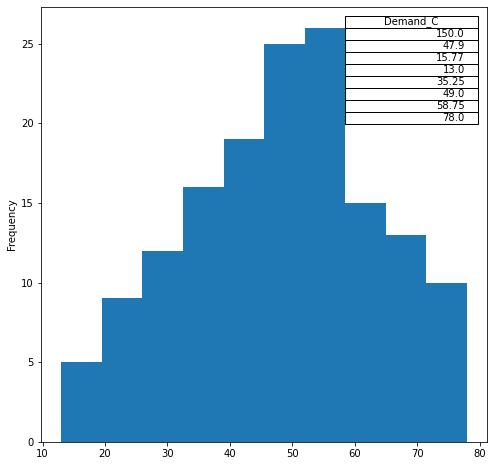

In [11]:
fix, ax = plt.subplots(1,1, figsize = (8,8))
table(ax, round(lrp.set_of_all_customers["Demand_C"].describe(), 2), loc = "upper right", colWidths = [0.3]);

lrp.set_of_all_customers["Demand_C"].plot.hist(bins = 10);

In [7]:
sum(lrp.set_of_all_customers["Demand_C"])

14225.0

In [8]:
lrp.V_cfg(Vehicle_N = 3, capacity_V = [5000], fixed_cost_V = [22.5])

capacity_V  fixed_cost_V
V_ID                          
V_1         5000          22.5
V_2         5000          22.5
V_3         5000          22.5

In [9]:
lrp.Dist_m(cost_per_meter = 0.00018)

DC1        C1        C2        C3        C4        C5        C6  \
DC1   0.808326  0.000000  0.514368  0.598770  0.664650  0.878490  1.671300   
C1    1.178658  0.397512  0.000000  0.969102  1.035000  1.248822  2.041632   
C2    0.640314  0.500166  0.102672  0.000000  0.496656  0.710478  1.503288   
C3    0.152640  0.770544  0.373032  0.270378  0.000000  0.307170  1.099980   
C4    0.347562  0.903996  0.506484  0.403812  0.307170  0.000000  0.792810   
...        ...       ...       ...       ...       ...       ...       ...   
C296  1.665036  1.522656  1.207836  1.455480  1.521378  1.735200  2.528010   
C297  1.141686  1.785816  1.388304  1.285632  1.186182  0.911628  0.721584   
C298  0.999108  1.643238  1.245726  1.143054  1.043604  0.769050  0.698148   
C299  0.555930  0.933570  0.536058  0.433386  0.506646  0.445248  1.226970   
C300  0.359748  1.193040  0.795546  0.692874  0.516546  0.546210  1.047006   

            C7        C8        C9  ...      C291      C292      C293  \
DC1   1.032048  0.752544  1.117224  ...  0.957096  1.077534  0.774594   
C1    1.402380  1.122894  1.487556  ...  1.327428  1.447866  1.144926   
C2    0.864054  0.584550  0.878886  ...  0.718776  0.909540  0.406656   
C3    0.542376  0.315396  0.548280  ...  0.388152  0.506214  0.677034   
C4    0.298638  0.522594  0.662670  ...  0.583074  0.199044  0.810468   
...        ...       ...       ...  ...       ...       ...       ...   
C296  1.888776  1.609272  1.903608  ...  1.743498  1.934262  1.156770   
C297  1.001124  1.404414  1.224954  ...  1.260648  0.774108  1.692288   
C298  0.977688  1.261836  1.082376  ...  1.118070  0.750672  1.549710   
C299  0.375390  0.552168  0.951570  ...  0.791442  0.613530  0.840042   
C300  0.763398  0.831942  0.224100  ...  0.259794  0.627228  1.099530   

          C294      C295      C296      C297      C298      C299      C300  
DC1   1.731528  0.578466  1.607580  1.811070  1.677276  0.908064  1.135998  
C1    2.101878  0.948798  1.881090  2.181402  2.047608  1.278396  1.506348  
C2    1.563534  0.210528  1.239660  1.643058  1.509264  0.740052  0.968004  
C3    1.157706  0.480906  1.510020  1.237230  1.103436  0.478854  0.522864  
C4    0.889272  0.614340  1.643472  0.954414  0.835002  0.452466  0.543312  
...        ...       ...       ...       ...       ...       ...       ...  
C296  2.588256  1.044414  0.000000  2.667780  2.533986  1.764774  1.992726  
C297  0.213696  1.496160  2.525292  0.000000  0.154854  1.319832  1.105596  
C298  0.111294  1.353582  2.382714  0.133794  0.000000  1.221516  0.963018  
C299  1.331406  0.643914  1.673046  1.396548  1.277136  0.000000  0.926154  
C300  1.051182  0.903402  1.932534  1.130724  0.996912  0.880110  0.000000  

[301 rows x 301 columns]

In [10]:
lrp.Time_m(cost_per_second = 0.0045, traffic_factor = 1.5, service_time = 120)

DC1      C1      C2      C3      C4      C5      C6      C7      C8  \
DC1   1.6872  0.0000  0.9462  1.1328  1.2918  2.0538  3.5472  2.5734  1.4202   
C1    2.7522  1.1442  0.4800  2.1978  2.3568  3.1188  4.6122  3.6384  2.4852   
C2    2.0466  1.3734  0.7092  0.4800  1.6512  2.4132  3.9066  2.9328  1.7796   
C3    0.8754  2.0166  1.3524  1.1232  0.4800  1.3842  3.1140  2.2392  1.1562   
C4    1.3656  2.4336  1.7694  1.5402  1.3842  0.4800  2.3106  1.3350  1.7442   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
C296  4.7490  4.2510  3.6192  4.1946  4.3536  5.1156  6.6090  5.6352  4.4820   
C297  3.3708  4.5804  3.9162  3.6870  3.5544  2.7900  2.7318  3.3618  3.8910   
C298  2.8008  4.0104  3.3462  3.1170  2.9844  2.2200  2.3934  2.7918  3.3210   
C299  2.4516  2.8914  2.2272  1.9980  2.2158  1.9512  3.7746  1.7838  2.2020   
C300  1.5372  3.2088  2.5446  2.3154  2.0280  1.9698  2.8386  2.5416  2.7042   

          C9  ...    C291    C292    C293    C294    C295    C296    C297  \
DC1   2.3568  ...  1.9716  2.5272  1.7490  3.7926  1.1262  3.8166  4.1136   
C1    3.4218  ...  3.0366  3.5922  2.8140  4.8576  2.1912  4.8006  5.1786   
C2    2.5338  ...  2.1486  2.8866  1.6170  4.1520  0.9942  3.6846  4.4730   
C3    1.9674  ...  1.5822  1.9956  2.2602  3.3594  1.6374  4.3278  3.6804   
C4    2.1558  ...  2.0724  1.0914  2.6772  2.5560  2.0544  4.7448  2.8770   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
C296  5.2362  ...  4.8510  5.5890  3.6594  6.8544  3.2418  0.4800  7.1754   
C297  3.5802  ...  3.6666  3.1050  4.8240  1.3302  4.2012  6.8916  0.4800   
C298  3.0102  ...  3.0966  2.5482  4.2540  0.9222  3.6312  6.3216  1.0152   
C299  3.5436  ...  3.1584  2.5152  3.1350  4.0200  2.5122  5.2026  4.3410   
C300  1.1112  ...  1.1976  2.2980  3.4524  3.1236  2.8296  5.5200  3.4446   

        C298    C299    C300  
DC1   3.5784  2.3538  2.5710  
C1    4.6434  3.4188  3.6360  
C2    3.9378  2.7132  2.8662  
C3    3.1452  2.1084  1.9338  
C4    2.3418  1.9878  1.9626  
...      ...     ...     ...  
C296  6.6402  5.4156  5.5686  
C297  1.0992  4.2978  3.3870  
C298  0.4800  3.7278  2.8170  
C299  3.8058  0.4800  3.4080  
C300  2.9094  3.4062  0.4800  

[301 rows x 301 columns]

In [11]:
lrp.solve(Gap = 0.02, Time_Limit = 3600, Para = 1, DC_Max = 0)

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2022-01-23
Set parameter MIPGap to value 0.02
Set parameter LogFile to value "gurobi_logee.log"
Set parameter TimeLimit to value 3600
Set parameter Method to value 2
Set parameter Presolve to value 2
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 271814 rows, 273004 columns and 2434505 nonzeros
Model fingerprint: 0x3a150f17
Variable types: 900 continuous, 272104 integer (272104 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+04]
  Objective range  [5e-01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+03]
Presolve removed 1508 rows and 1204 columns (presolve time = 5s) ...
Presolve removed 1508 rows and 1204 columns (presolve time = 17s) ...
Presolve removed 1508 rows and 120

In [12]:
lrp.DC_Print()

The following DCs are established:
-DC1


In [13]:
lrp.Route_Counter()

 Vehicle V_1 has 89.0 stops on its route and is en route for 491.8 minutes
 Vehicle V_2 has 107.0 stops on its route and is en route for 561.6 minutes
 Vehicle V_3 has 107.0 stops on its route and is en route for 483.9 minutes


In [ ]:
lrp.Route_DC(DC = "DC3")

In [ ]:
lrp.Route_DC(DC= "DC2")

In [14]:
lrp.Route_DC(DC= "DC1")

Route for Vehicle V_1: DC1 -> C36 -> C35 -> C109 -> C288 -> C256 -> C290 -> C248 -> C138 -> C174 -> C232 -> C129 -> C128 -> C131 -> C125 -> C126 -> C257 -> C271 -> C299 -> C62 -> C79 -> C192 -> C249 -> C241 -> C78 -> C47 -> C177 -> C172 -> C30 -> C41 -> C293 -> C167 -> C168 -> C163 -> C166 -> C162 -> C170 -> C255 -> C136 -> C226 -> C228 -> C147 -> C146 -> C145 -> C169 -> C53 -> C54 -> C265 -> C1 -> C2 -> C52 -> C275 -> C173 -> C104 -> C91 -> C116 -> C272 -> C282 -> C211 -> C251 -> C106 -> C215 -> C107 -> C243 -> C300 -> C105 -> C291 -> C274 -> C210 -> C180 -> C178 -> C72 -> C115 -> C113 -> C63 -> C59 -> C58 -> C32 -> C33 -> C38 -> C28 -> C27 -> C234 -> C233 -> C110 -> C98 -> C199 -> C197 -> C198 -> DC1
Route for Vehicle V_3: DC1 -> C175 -> C244 -> C247 -> C285 -> C179 -> C158 -> C22 -> C25 -> C262 -> C89 -> C194 -> C235 -> C195 -> C86 -> C85 -> C292 -> C84 -> C264 -> C76 -> C37 -> C14 -> C15 -> C16 -> C17 -> C18 -> C19 -> C20 -> C284 -> C29 -> C221 -> C295 -> C160 -> C26 -> C260 -> C13

In [15]:
lrp.Route_Distance()

Total Distance 146740.1m for Vehicle V_1
Total Distance 166870.1m for Vehicle V_2
Total Distance 123775.5m for Vehicle V_3


In [16]:
lrp.Cost_Printer()

Distance traveled: 437385.7m - in km 437.4 
Transportation Cost 447.7€
Time elapsed on the routes 92241.9s - in Minutes: 1537.4
Delivery Driver labor cost 369.0€
Fuel Cost 78.7€
Fixed Costs for Depots: 1920.0€ 
Variable Warehousing Cost 4082.6€ 
Fixed Vehicle Cost 67.5€
Total Cost: 6517.8€
Variable Cost per Order 13.6€
Transportation Cost per Order 1.5€
Fixed Warehousing Cost per Order 6.4€
Total Cost per Item 0.5€
Cost per Order 21.7€


In [25]:
lrp.cost_df.to_csv("model_results/first_cost_df")
lrp.cost_df

Customers_N  Distance     Time  FixedDC_Cost  Trans_Cost  Variable_DC  \
0           50  100850.6  19575.3         320.0        96.5      699.132   

   Fixed_V  Total_Cost  Var_per_order  Trans_per_order  FixedDC_per_order  \
0     67.5      1183.1           14.0              1.9                6.4   

   Total_Cost_per_order  Cost_per_item  
0                  23.7            0.5

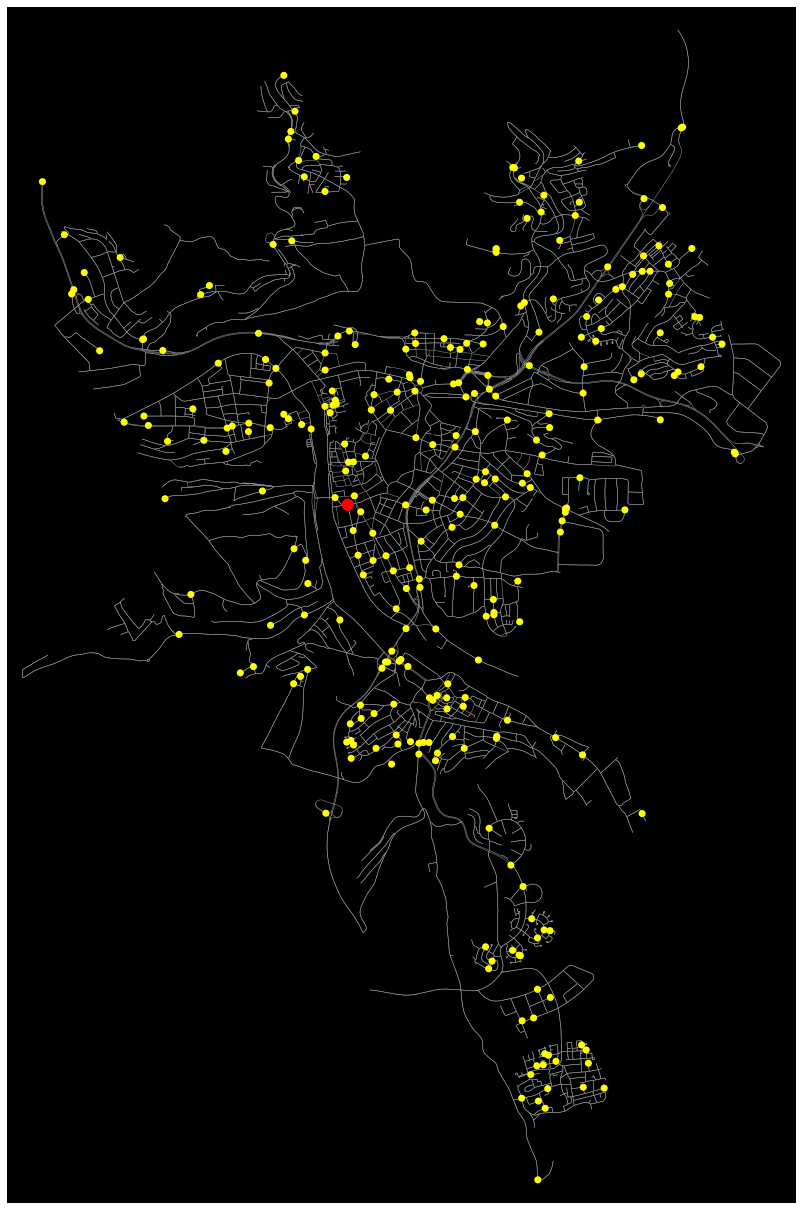

In [17]:
lrp.Basic_Plot()

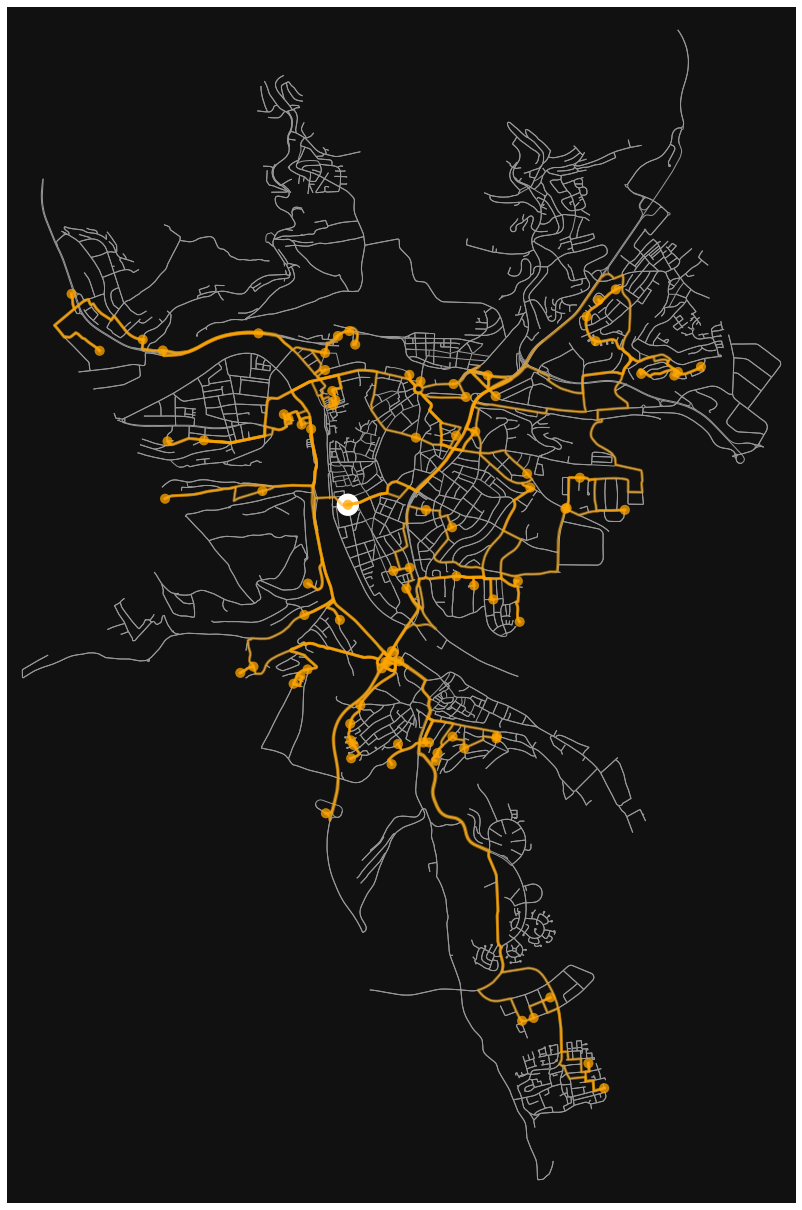

In [18]:
lrp.Route_Plot(Vehicle = "V_1")

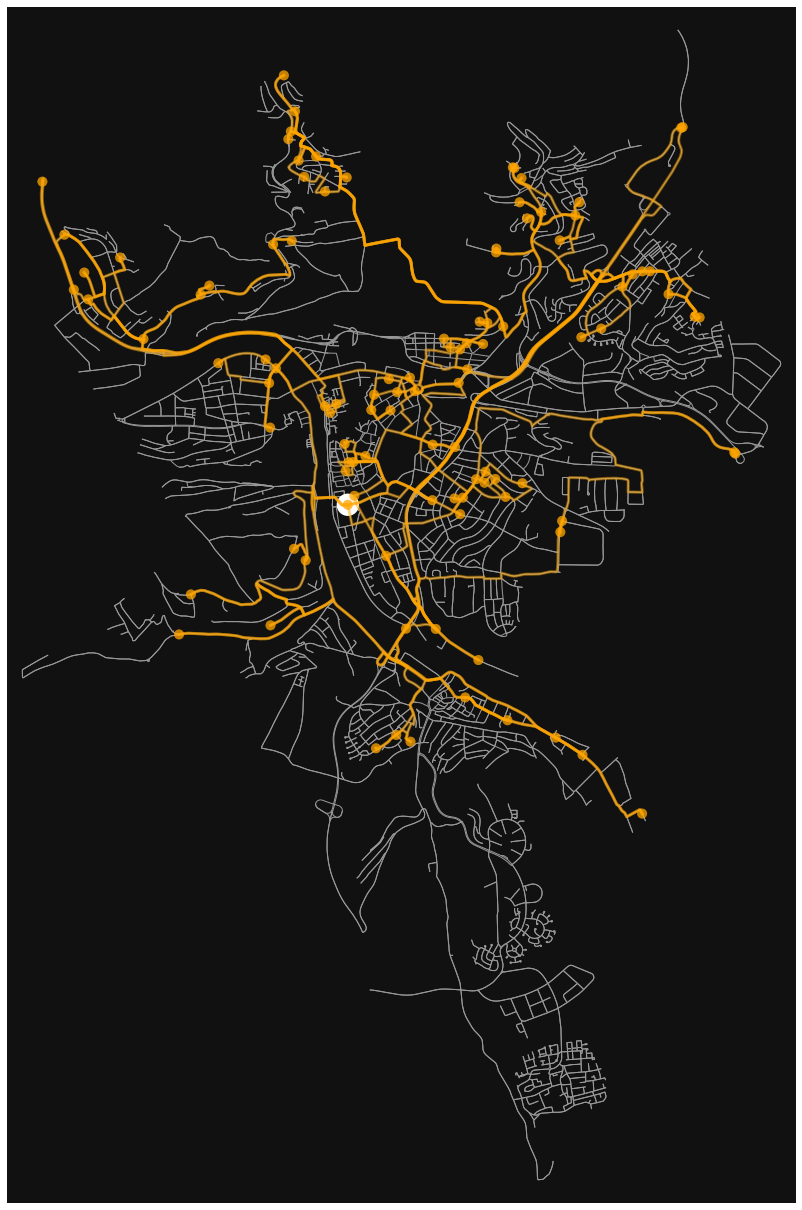

In [19]:
lrp.Route_Plot(Vehicle = "V_2")

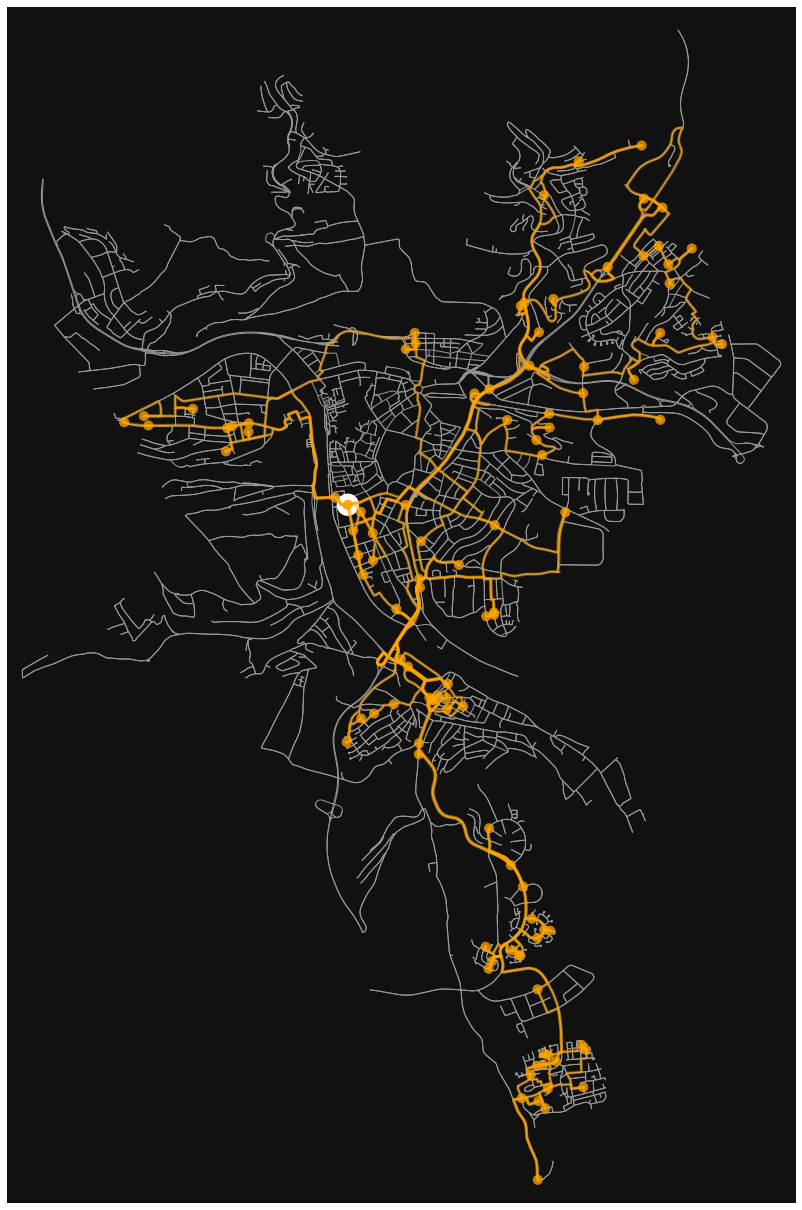

In [20]:
lrp.Route_Plot(Vehicle = "V_3")

In [1]:
from FLM_Gen import *

In [2]:
flm = FLM()

In [3]:
flm.customer_gen(customers_n = 1000, demand_per_customer= 5, seed = 3, city = "Albstadt")

lat       lon  Demand_C
osmid                                    
286882168   48.239707  9.029715         5
293009122   48.251612  8.971251         5
255558685   48.288527  8.991621         5
519323595   48.222009  9.028057         5
286871175   48.254794  9.006041         5
...               ...       ...       ...
1613299480  48.238650  9.028410         5
271962274   48.249755  8.999874         5
288337977   48.252058  9.001198         5
282261052   48.258071  9.020334         5
326247633   48.240909  9.032362         5

[1000 rows x 3 columns]

In [4]:
flm.pup_gen(capacity_per_pup=2500)

lat       lon  Capacity_pup
osmid                                        
286882168   48.239707  9.029715          2500
293009122   48.251612  8.971251          2500
255558685   48.288527  8.991621          2500
519323595   48.222009  9.028057          2500
286871175   48.254794  9.006041          2500
...               ...       ...           ...
1613299480  48.238650  9.028410          2500
271962274   48.249755  8.999874          2500
288337977   48.252058  9.001198          2500
282261052   48.258071  9.020334          2500
326247633   48.240909  9.032362          2500

[1000 rows x 3 columns]

In [5]:
flm.dist_gen()

54430983    54431038    54431056    54431063    54431070    \
osmid                                                                    
54430983           0.0       623.9       307.8       215.3       347.4   
54431038         623.9         0.0       316.2       408.7       276.5   
54431056         307.8       316.2         0.0        92.5        39.6   
54431063         215.3       408.7        92.5         0.0       132.1   
54431070         347.4       276.5        39.6       132.1         0.0   
...                ...         ...         ...         ...         ...   
7560535669      5856.3      6480.3      6164.1      6071.6      6203.7   
7629497091     11751.3     12248.1     11944.5     11852.0     11984.1   
8066894711      9059.3      9556.1      9252.5      9160.0      9292.1   
8235283535      5577.9      6074.8      5771.2      5678.7      5810.8   
8482290336     11709.6     12206.4     11902.8     11810.3     11942.4   

            54431198    54431234    59733053    59733093    59733102    ...  \
osmid                                                                   ...   
54430983         605.3       761.7      9861.6     12068.2     11902.3  ...   
54431038         368.9       328.3     10358.4     12621.7     12455.8  ...   
54431056         297.5       453.9     10054.8     12318.1     12152.2  ...   
54431063         390.0       546.4      9962.3     12225.6     12059.7  ...   
54431070         337.1       493.6     10094.5     12357.7     12191.8  ...   
...                ...         ...         ...         ...         ...  ...   
7560535669      6419.0      6575.4      8724.8      8832.0      8666.1  ...   
7629497091     12060.7     12217.1      4273.8      1651.6      2017.5  ...   
8066894711      9368.7      9525.1       798.6      5400.4      5766.3  ...   
8235283535      5887.3      6043.7      7877.8      7069.1      6903.2  ...   
8482290336     12019.0     12175.4      4237.8      3822.4      4188.3  ...   

            7282064822  7282064855  7282064858  7538528629  7538528632  \
osmid                                                                    
54430983        9695.5      9943.6      9990.8      5534.3      5441.6   
54431038       10192.3     10440.4     10487.6      6031.1      5938.4   
54431056        9888.7     10136.8     10184.0      5727.5      5634.8   
54431063        9796.2     10044.3     10091.5      5635.0      5542.3   
54431070        9928.3     10176.4     10223.6      5767.2      5674.4   
...                ...         ...         ...         ...         ...   
7560535669      8558.7      8806.8      8854.0      2640.8      2548.0   
7629497091      2661.3      2707.4      2660.3      7721.2      7628.4   
8066894711      1428.3      1676.4      1723.6      6584.7      6491.9   
8235283535      7711.7      7959.8      8007.0       877.8       785.1   
8482290336      2625.3      2762.7      2715.5      9235.0      9142.2   

            7560535669  7629497091  8066894711  8235283535  8482290336  
osmid                                                                   
54430983        5856.3     11891.5      9063.1      5825.5     11874.5  
54431038        6480.3     12388.3      9559.9      6322.3     12371.3  
54431056        6164.1     12084.7      9256.3      6018.7     12067.7  
54431063        6071.6     11992.2      9163.8      5926.2     11975.2  
54431070        6203.7     12124.3      9295.9      6058.3     12107.3  
...                ...         ...         ...         ...         ...  
7560535669         0.0      9436.4      7926.3      1763.0     10737.7  
7629497091      9447.3         0.0      3589.0      7684.3      2170.7  
8066894711      7875.4      3748.8         0.0      7058.6      3731.8  
8235283535      1763.0      7673.5      7079.3         0.0      9844.2  
8482290336     10525.7      2170.8      3547.2      9709.0         0.0  

[1000 rows x 1000 columns]

In [6]:
flm.solver(PuP_N = 6, Gap = 0.05)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-23

********************************************
Model is being built, this may take a moment
********************************************

Set parameter MIPGap to value 0.05
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1002001 rows, 1001000 columns and 4002000 nonzeros
Model fingerprint: 0x38064aa0
Variable types: 0 continuous, 1001000 integer (1001000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+03]
  Objective range  [2e+00, 2e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
Found heuristic solution: objective 6264388.7000
Presolve removed 0 rows and 0 columns (presolve time = 5s) ...
Presolve time: 8.99s
Presolved: 1002001 rows, 1001000 columns, 4002000 nonzeros
Variable types: 0 continuous, 1001000 integer (1001000 binary)
Found heuristic solution:

In [7]:
flm.PuP_Print()

The following Pickup-Points are established:
-290847730; Coordinates: 48.2554692, 9.0136856
-366360585; Coordinates: 48.2110663, 9.022576
-293003525; Coordinates: 48.2304419, 8.9677358
-248746221; Coordinates: 48.237164, 9.027823
-262388012; Coordinates: 48.222982, 8.9184284
-255887075; Coordinates: 48.2827414, 9.001414


In [8]:
flm.PuP_Alloc()

PuP_ID    PuP_lat   PuP_lon        C_ID      C_LAT     C_LON  \
0    248746221  48.237164  9.027823   286882168  48.239707  9.029715   
341  248746221  48.237164  9.027823  1613283834  48.240961  9.024828   
344  248746221  48.237164  9.027823   254627135  48.239675  9.029579   
345  248746221  48.237164  9.027823   301917466  48.242358  9.025186   
352  248746221  48.237164  9.027823   260464548  48.235997  9.029741   
..         ...        ...       ...         ...        ...       ...   
533  366360585  48.211066  9.022576   309341882  48.215902  8.992735   
530  366360585  48.211066  9.022576  3460242786  48.213763  9.027136   
529  366360585  48.211066  9.022576   256895627  48.217229  9.027497   
574  366360585  48.211066  9.022576  1330575184  48.213129  9.031750   
499  366360585  48.211066  9.022576   321893815  48.211932  9.008224   

     Distance  Travel_Time  Walking_Time  
0       423.7         31.1         305.1  
341     522.4         59.0         376.1  
344     397.8         28.7         286.4  
345     656.5         57.2         472.7  
352     253.3         30.4         182.4  
..        ...          ...           ...  
533    2651.5        220.3        1909.1  
530     747.0         81.5         537.8  
529     843.6         57.5         607.4  
574    2635.0        219.1        1897.2  
499    1095.3         74.7         788.6  

[1000 rows x 9 columns]

In [9]:
flm.Alloc_Count()

Customer_Count
PuP_ID                   
366360585             280
290847730             247
293003525             147
255887075             140
248746221             127
262388012              59

In [10]:
flm.Alloc_Stats()

Max_Distance  Mean_Distance  Median_Distance  Max_Time  Mean_Time  \
PuP_ID                                                                         
248746221        2205.4          780.7            714.8     255.5       77.4   
255887075        3515.6         1088.2            871.4     288.1      115.7   
262388012        2833.6          771.6            545.9     167.5       54.6   
290847730        5502.8         1327.0           1241.5     402.1      110.4   
293003525        6529.5         2089.4           2049.1     381.1      141.5   
366360585        3354.9         1408.0           1337.4     317.9      117.8   

           Median_Time  
PuP_ID                  
248746221         66.1  
255887075         87.5  
262388012         46.3  
290847730         95.9  
293003525        151.7  
366360585         99.6

In [11]:
# check for walking distance
flm.Alloc_Within(Time1= 120, Time2 = 300, Dist1 = 250, Dist2 = 500, Walk_Time1 = 300, Walk_Time2 = 600)

Within_Time1  Within_Time2  Within_Dist1  Within_Dist2  \
PuP_ID                                                              
248746221          81.9         100.0          12.6          34.6   
255887075          67.1         100.0           9.3          27.1   
262388012          91.5         100.0          15.3          44.1   
290847730          59.5          98.4           8.9          23.5   
293003525          33.3          92.5          12.2          23.8   
366360585          57.1          99.6           1.4           7.1   

           Within_Walk_Time1  Within_Walk_Time2  
PuP_ID                                           
248746221               27.6               57.5  
255887075               22.9               49.3  
262388012               33.9               72.9  
290847730               19.0               35.6  
293003525               20.4               26.5  
366360585                2.9               29.3

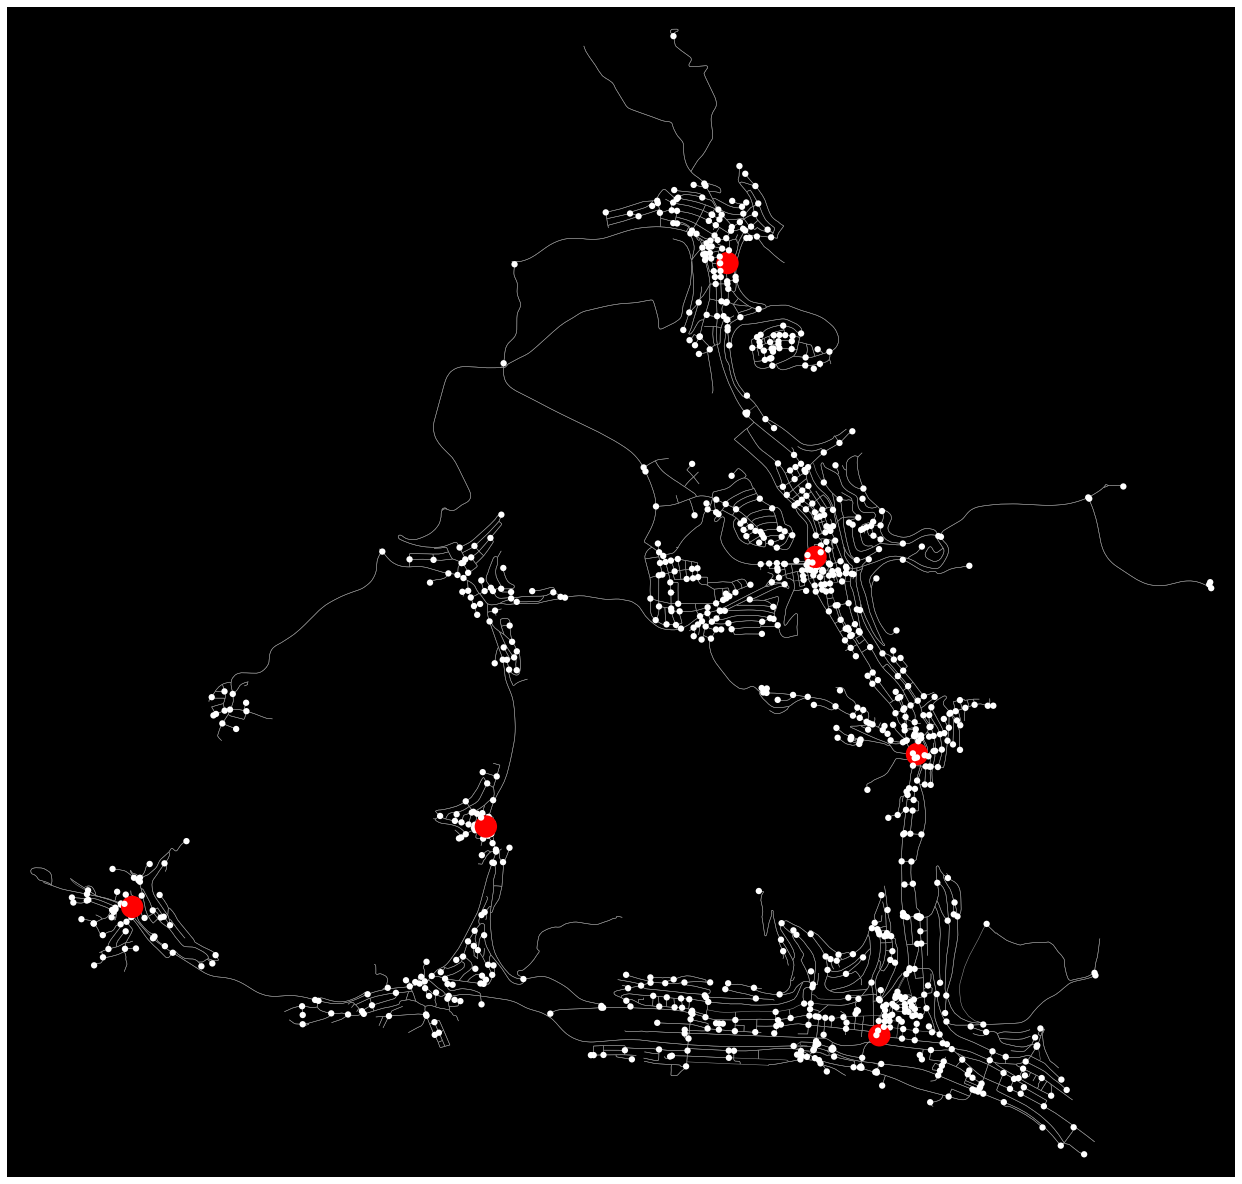

In [12]:
flm.Basic_Alloc_Plot()

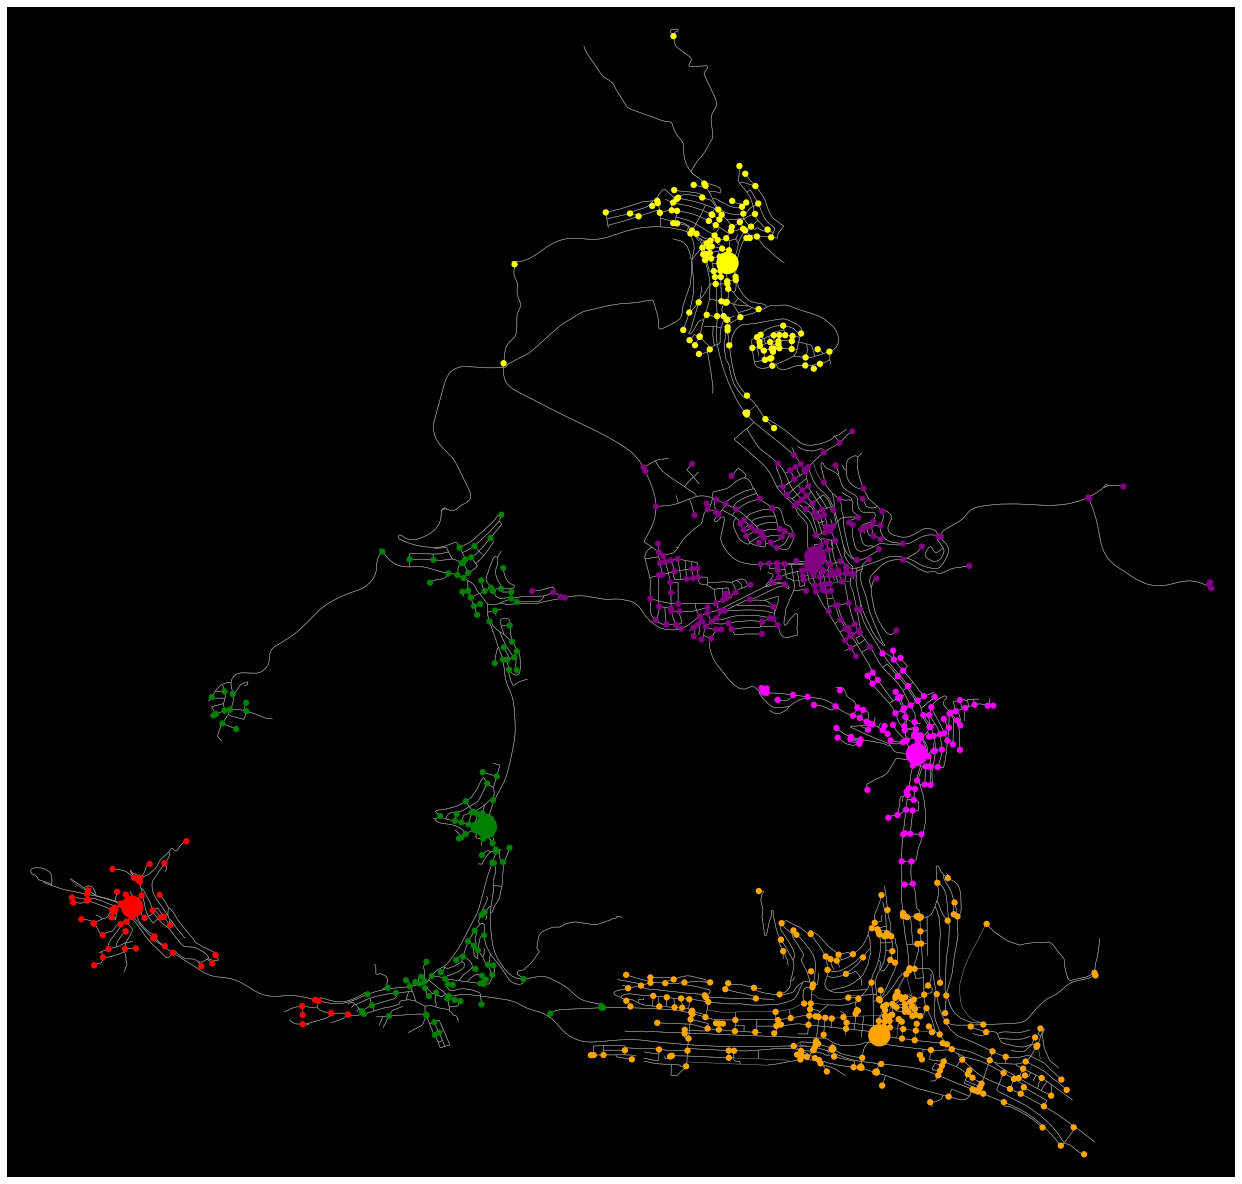

In [13]:
flm.Colored_Plot()

In [3]:
from MB_Online import *

SyntaxError: invalid syntax (MB_Online.py, line 283)

In [29]:
lpr = LPR()

In [31]:
lpr.C_cfg(customer_N = 50, seed = 3)

lat       lon       osmid  Demand_C
C_ID                                           
C1    49.771879  9.940641    10799942      44.0
C2    49.788421  9.952661    21287874      55.0
C3    49.786582  9.931788    27353422      12.0
C4    49.776444  9.943039    27511381      57.0
C5    49.778628  9.941272    28099506      60.0
C6    49.803697  9.973150    29761352      55.0
C7    49.781555  9.943229    29877216      46.0
C8    49.785017  9.944076    29877245      41.0
C9    49.773253  9.954381    30255680      59.0
C10   49.799659  9.941323    33174128      52.0
C11   49.757992  9.942848    36720569      40.0
C12   49.776658  9.952296    40932452      37.0
C13   49.799092  9.949661    42411314      57.0
C14   49.793249  9.949220    43632326      48.0
C15   49.794972  9.957999    51519006      27.0
C16   49.796487  9.926750    54140220      68.0
C17   49.800872  9.991186   101458357      28.0
C18   49.759512  9.931195   248813018      62.0
C19   49.758641  9.935494   251053408      77.0
C20   49.800866  9.971167   253089137      65.0
C21   49.802815  9.940601   257042823      74.0
C22   49.791247  9.997080   259448553      64.0
C23   49.796207  9.904117   275593515      63.0
C24   49.762999  9.947667   280792458      28.0
C25   49.758641  9.950617   280991147      49.0
C26   49.763291  9.950442   281266824      44.0
C27   49.791503  9.909776   290463911      44.0
C28   49.738456  9.965314   304648496      20.0
C29   49.723504  9.963070   304656436      67.0
C30   49.798960  9.948780   305388885      58.0
C31   49.804617  9.984202   310781491      54.0
C32   49.718801  9.964496   312025489      59.0
C33   49.805716  9.954576   316421515      27.0
C34   49.723785  9.971895   360643704      46.0
C35   49.721135  9.971021   360648502      36.0
C36   49.719598  9.963324   360659795      40.0
C37   49.766605  9.922558   362242416      48.0
C38   49.766989  9.912244   362654343      59.0
C39   49.826063  9.920473   364909282      46.0
C40   49.804822  9.930922   570096127      56.0
C41   49.794374  9.896491   720571230      40.0
C42   49.808851  9.905446  1032261863      52.0
C43   49.811293  9.885502  2381601797      72.0
C44   49.804564  9.915360  3101800431      35.0
C45   49.813527  9.956087  3418413364      61.0
C46   49.827302  9.987800  5301313588      39.0
C47   49.791096  9.963971  6034416208      26.0
C48   49.757266  9.945708  6533691138      32.0
C49   49.813958  9.989616  6895353620      52.0
C50   49.763987  9.945214  6905414381      55.0

In [32]:
lpr.DC_cfg(DC_N = 1,
    customer_N = 50,
    fixed_cost_factor = 0.08,
    avg_basket_size = 80,
    capacity_DC=[3000],
    varCost_DC =[0.287,0.3,0.3,0.3,0.3],
    lat_DC =[49.876709, 49.773391, 49.800460, 49.811422, 49.791321],
    lon_DC=[10.085187, 9.923226, 9.951607, 9.981127, 9.953342],
    osmid =[8962820811, 30747843, 40430241, 27352149, 27457548])

fixed_cost_DC  capacity_DC  varCost_DC        lat        lon  \
DC_ID                                                                 
DC1            320.0         3000       0.287  49.876709  10.085187   

            osmid  
DC_ID              
DC1    8962820811

In [34]:
lpr.V_cfg(Vehicle_N = 3, capacity_V = [1000], fixed_cost_V = [22.5])

capacity_V  fixed_cost_V
V_ID                          
V_1         1000          22.5
V_2         1000          22.5
V_3         1000          22.5

In [35]:
lpr.Dist_M(cost_per_meter = 0.00018)

DC1        C1        C2        C3        C4        C5        C6  \
DC1  0.000000  3.039138  2.665134  2.893500  2.937996  2.947878  2.287386   
C1   3.355686  0.000000  0.710478  0.647658  0.446310  0.465876  1.455516   
C2   2.681424  0.403812  0.000000  0.345870  0.302670  0.311922  0.745020   
C3   2.885670  0.396342  0.330606  0.000000  0.298620  0.233262  0.989748   
C4   3.056958  0.109494  0.411768  0.342396  0.000000  0.160614  1.156788   
C5   2.958048  0.217944  0.311922  0.225108  0.154332  0.000000  1.056942   
C6   2.311578  1.123578  0.749574  0.977958  1.022436  1.032318  0.000000   
C7   2.880396  0.224172  0.198972  0.211680  0.123030  0.168822  0.943992   
C8   2.812050  0.324270  0.157950  0.237384  0.223128  0.194526  0.892260   
C9   3.052350  0.352260  0.374040  0.480330  0.251118  0.411750  1.115946   
C10  2.633292  0.639036  0.336132  0.404838  0.537894  0.506826  0.737874   
C11  3.471624  0.546696  0.826434  0.763596  0.562248  0.581814  1.571454   
C12  3.006522  0.260820  0.328230  0.424548  0.159678  0.320310  1.070118   
C13  2.537046  0.679986  0.377082  0.453528  0.578862  0.547794  0.641628   
C14  2.721672  0.571680  0.240912  0.373338  0.470556  0.450342  0.830142   
C15  2.684142  0.565362  0.161550  0.457992  0.464220  0.473454  0.730494   
C16  2.895876  0.593442  0.539838  0.295686  0.531648  0.466290  1.000458   
C17  2.470572  1.200456  0.826470  1.054836  1.099332  1.109214  0.290664   
C18  3.437622  0.512694  0.792414  0.729594  0.528246  0.547812  1.537434   
C19  3.498930  0.574002  0.853722  0.790902  0.589554  0.609120  1.598760   
C20  2.469384  0.910764  0.536778  0.765144  0.809640  0.819522  0.250812   
C21  2.639844  0.722016  0.419112  0.495558  0.620874  0.589824  0.744660   
C22  2.740572  1.021896  0.666378  0.962820  0.920754  0.978300  0.522000   
C23  3.233250  1.015956  0.936090  0.672894  0.971496  0.903852  1.337832   
C24  3.465306  0.540378  0.820098  0.757278  0.555930  0.575496  1.565136   
C25  3.521772  0.596844  0.876582  0.813744  0.612396  0.631980  1.621602   
C26  3.461598  0.536688  0.816408  0.753570  0.552222  0.571806  1.561428   
C27  3.147714  0.875376  0.850536  0.532314  0.830934  0.763290  1.252296   
C28  4.022424  1.097496  1.377234  1.314396  1.113048  1.132632  2.122254   
C29  4.421214  1.496286  1.776006  1.713186  1.511838  1.531404  2.521044   
C30  2.525094  0.668034  0.365130  0.441576  0.566910  0.535842  0.629676   
C31  2.418588  1.166868  0.792864  1.021230  1.065726  1.075608  0.257058   
C32  4.389210  1.464282  1.744020  1.681182  1.479834  1.499400  2.489040   
C33  2.554992  0.852030  0.545616  0.625572  0.750888  0.719838  0.725004   
C34  4.439448  1.514520  1.794240  1.731420  1.530072  1.549638  2.539260   
C35  4.435362  1.510452  1.790172  1.727352  1.526004  1.545570  2.535192   
C36  4.361310  1.436400  1.716120  1.653300  1.451952  1.471518  2.461140   
C37  3.552534  0.627624  0.907344  0.731610  0.643176  0.662742  1.652364   
C38  3.522222  0.597312  0.877032  0.682686  0.612864  0.632430  1.622052   
C39  3.274650  1.635192  1.294362  1.408734  1.534050  1.503000  1.444644   
C40  2.782530  0.813888  0.561816  0.516150  0.752094  0.686754  0.887364   
C41  3.280410  1.020366  0.983232  0.677304  0.975924  0.908280  1.384992   
C42  3.437190  1.285578  1.157238  0.987822  1.223784  1.158426  1.542006   
C43  3.508542  1.356930  1.228590  1.059192  1.295136  1.229778  1.613376   
C44  3.442392  1.290780  1.162440  0.993042  1.228986  1.163646  1.547226   
C45  2.403018  1.067634  0.693630  0.912636  0.966492  0.976374  0.573030   
C46  1.786482  1.435536  1.061532  1.289916  1.334394  1.344276  0.683784   
C47  2.750598  0.602856  0.199044  0.495504  0.501732  0.510966  0.574506   
C48  3.547602  0.622674  0.902412  0.839574  0.638226  0.657792  1.647432   
C49  2.208078  1.197324  0.823320  1.051704  1.096182  1.106064  0.334782   
C50  3.353094  0.428166  0.707886  0.645066  0.443718  0.463284  1.452924   

     

In [36]:
lpr.Time_m(cost_per_second = 0.0045, traffic_factor = 1.8, service_time = 120)

DC1       C1       C2       C3       C4       C5       C6       C7  \
DC1   0.00000  7.15635  5.94540  6.68412  6.82911  7.19037  5.29092  6.74406   
C1    8.56386  0.54000  3.10689  2.56662  1.91457  2.09682  5.43645  2.38842   
C2    6.45219  1.97127  0.54000  1.69020  1.64403  1.78497  3.24297  1.33866   
C3    7.17147  1.89189  1.72746  0.54000  1.56465  1.51443  4.04406  1.34514   
C4    7.66800  0.89478  2.21103  1.64970  0.54000  1.17990  4.54059  1.49256   
C5    7.69716  1.38078  1.78497  1.34838  1.15965  0.54000  4.48794  1.40265   
C6    6.06663  4.32837  3.11742  3.85614  4.00113  4.36239  0.54000  3.91608   
C7    7.25085  1.39617  1.33866  1.30788  1.06893  1.40265  4.04163  0.54000   
C8    6.95277  1.72665  1.17180  1.44558  1.39941  1.54035  3.82536  1.09404   
C9    8.05275  2.15109  2.15028  2.75778  1.82385  2.46375  4.84353  1.98990   
C10   6.42627  2.62413  1.75905  1.94616  2.29689  2.55933  3.19761  2.30418   
C11   8.96400  2.26368  3.50703  2.96676  2.31471  2.49696  5.83659  2.78856   
C12   7.80408  1.65780  1.90161  2.44026  1.33056  1.97046  4.59486  1.71207   
C13   6.10146  2.74239  1.87731  2.06442  2.41515  2.67759  2.87280  2.42244   
C14   6.78429  2.59416  1.52334  1.99476  2.26692  2.60793  3.65688  2.27421   
C15   6.63849  2.67273  1.24146  2.22237  2.34549  2.48643  3.42927  2.04012   
C16   7.32699  2.46294  2.46375  1.56708  2.44593  2.39571  4.09833  2.22642   
C17   6.84990  4.86459  3.65364  4.39236  4.53735  4.89861  2.05956  4.45230   
C18   9.22320  2.52288  3.76623  3.22596  2.57391  2.75616  6.09579  3.04776   
C19   9.48321  2.78289  4.02624  3.48597  2.83392  3.01617  6.35580  3.30777   
C20   6.10956  3.48597  2.27502  3.01374  3.15873  3.51999  1.50633  3.07368   
C21   6.56073  2.96109  2.09601  2.28312  2.63385  2.89629  3.34341  2.64114   
C22   6.59880  3.97521  2.73267  3.50298  3.64797  3.97764  2.24424  3.53133   
C23   8.55414  4.17528  3.88692  3.02994  4.05459  4.00437  5.32548  3.83508   
C24   9.14949  2.44917  3.69252  3.15225  2.50020  2.68245  6.02208  2.97405   
C25   9.23130  2.53098  3.77433  3.23406  2.58201  2.76426  6.10389  3.05586   
C26   9.13005  2.42973  3.67308  3.13281  2.48076  2.66301  6.00264  2.95461   
C27   8.28360  3.90474  3.61638  2.75940  3.78405  3.73383  5.05494  3.56454   
C28  10.93230  4.23198  5.47533  4.93506  4.28301  4.46526  7.80489  4.75686   
C29  11.75121  5.05089  6.29424  5.75397  5.10192  5.28417  8.62380  5.57577   
C30   6.06258  2.70351  1.83843  2.02554  2.37627  2.63871  2.83392  2.38356   
C31   6.64497  4.65966  3.44871  4.18743  4.33242  4.69368  1.85463  4.24737   
C32  11.51874  4.81842  6.06177  5.52150  4.86945  5.05170  8.39133  5.34330   
C33   6.69033  3.69414  2.67435  3.01617  3.36690  3.62934  3.52890  3.37419   
C34  11.77551  5.07519  6.31854  5.77827  5.12622  5.30847  8.64810  5.60007   
C35  11.82816  5.12784  6.37119  5.83092  5.17887  5.36112  8.70075  5.65272   
C36  11.46528  4.76496  6.00831  5.46804  4.81599  4.99824  8.33787  5.28984   
C37   9.91494  3.21462  4.45797  3.37176  3.26565  3.44790  6.78753  3.73950   
C38   9.82665  3.12633  4.36968  3.28347  3.17736  3.35961  6.69924  3.65121   
C39   9.30015  6.57126  5.45589  5.89329  6.24402  6.50646  6.15249  6.25131   
C40   7.02243  3.40578  2.55771  2.50992  3.09555  3.33855  3.80511  3.10284   
C41   8.54361  4.16475  3.87639  3.01941  4.04406  3.99384  5.31495  3.82455   
C42   8.86275  4.55355  4.19553  3.64797  4.53654  4.48632  5.63409  4.31703   
C43   8.82144  4.51224  4.15422  3.60666  4.49523  4.44501  5.59278  4.27572   
C44   8.52255  4.21335  3.85533  3.30777  4.19634  4.14612  5.29389  3.97683   
C45   6.41250  4.18257  2.97162  3.71034  3.85533  4.21659  3.20409  3.77028   
C46   4.33323  4.35186  3.14091  3.87963  4.02462  4.38588  2.48643  3.93957   
C47   6.89526  2.79666  1.36539  2.34630  2.46942  2.61036  2.92059  2.16405   
C48   9.42732  2.72700  3.97035  3.43008  2.77803  2.96028  6.29991  3.25188   
C49   5.95

In [37]:
lpr.solve(Gap = 0.05, Time_Limit = 600, Para = 0)

Set parameter MIPGap to value 0.05
Set parameter LogFile to value "gurobi_logee.log"
Set parameter TimeLimit to value 600
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7814 rows, 8004 columns and 68255 nonzeros
Model fingerprint: 0x3199d781
Variable types: 150 continuous, 7854 integer (7854 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+03]
  Objective range  [6e-01, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 255 rows and 204 columns
Presolve time: 0.08s
Presolved: 7559 rows, 7800 columns, 52500 nonzeros
Variable types: 150 continuous, 7650 integer (7650 binary)

Root relaxation: objective 1.111948e+03, 448 iterations, 0.02 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1111.9

In [38]:
lpr.DC_Print()

The following DCs are established:
-DC1


In [39]:
lpr.Route_Counter()

 Vehicle V_1 has 11.0 stops on its route and is en route for 108.5 minutes
 Vehicle V_2 has 21.0 stops on its route and is en route for 188.1 minutes
 Vehicle V_3 has 21.0 stops on its route and is en route for 167.3 minutes


In [40]:
lpr.Route_DC(DC = "DC1")

Route for Vehicle V_3: DC1 -> C10 -> C23 -> C41 -> C27 -> C16 -> C3 -> C7 -> C9 -> C12 -> C4 -> C1 -> C26 -> C24 -> C48 -> C25 -> C50 -> C37 -> C38 -> C5 -> C8 -> DC1
Route for Vehicle V_1: DC1 -> C13 -> C30 -> C21 -> C40 -> C44 -> C43 -> C42 -> C39 -> C33 -> C45 -> DC1
Route for Vehicle V_2: DC1 -> C49 -> C31 -> C17 -> C6 -> C20 -> C22 -> C47 -> C15 -> C2 -> C29 -> C36 -> C32 -> C35 -> C34 -> C28 -> C11 -> C19 -> C18 -> C14 -> C46 -> DC1


In [41]:
lpr.Route_Distance()

Total Distance 45694.0m for Vehicle V_1
Total Distance 65947.3m for Vehicle V_2
Total Distance 58427.5m for Vehicle V_3


In [42]:
lpr.Cost_Printer()

Distance traveled: 170068.8m - in km 170.1 
Transportation Cost 155.8€
Time elapsed on the routes 27831.7s - in Minutes: 463.9
Time based cost 125.2€
Fixed Costs for Depots: 320.0€ 
Variable Warehousing Cost 699.1€ 
Fixed Vehicle Cost 67.5€
Total Cost: 1242.4€
Cost per Order 24.8€
Variable Cost per Order 14.0€
Transportation Cost per Order 3.1€
Fixed Warehousing Cost per Order 6.4€
Total Cost per Item 0.5€


In [43]:
lpr.cost_df

Customers_N  Distance     Time  FixedDC_Cost  Trans_Cost  Variable_DC  \
0           50  170068.8  27831.7         320.0       155.8        699.1   

   Fixed_V  Total_Cost  Var_per_order  Trans_per_order  FixedDC_per_order  \
0     67.5      1242.4           14.0              3.1                6.4   

   Total_Cost_per_order  Cost_per_item  
0                  24.8            0.5

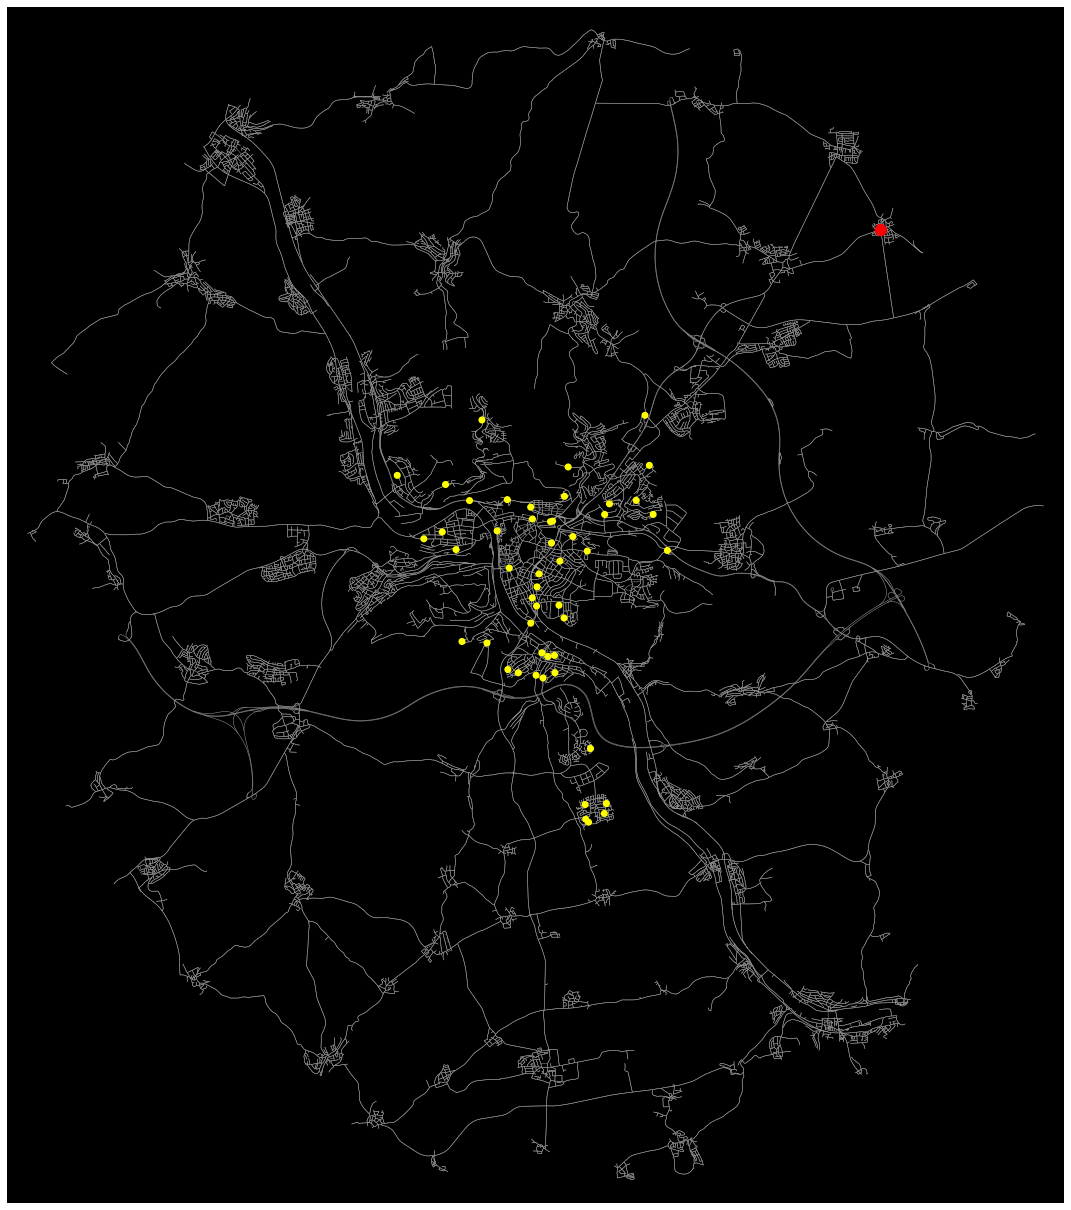

In [44]:
lpr.Basic_Plot()

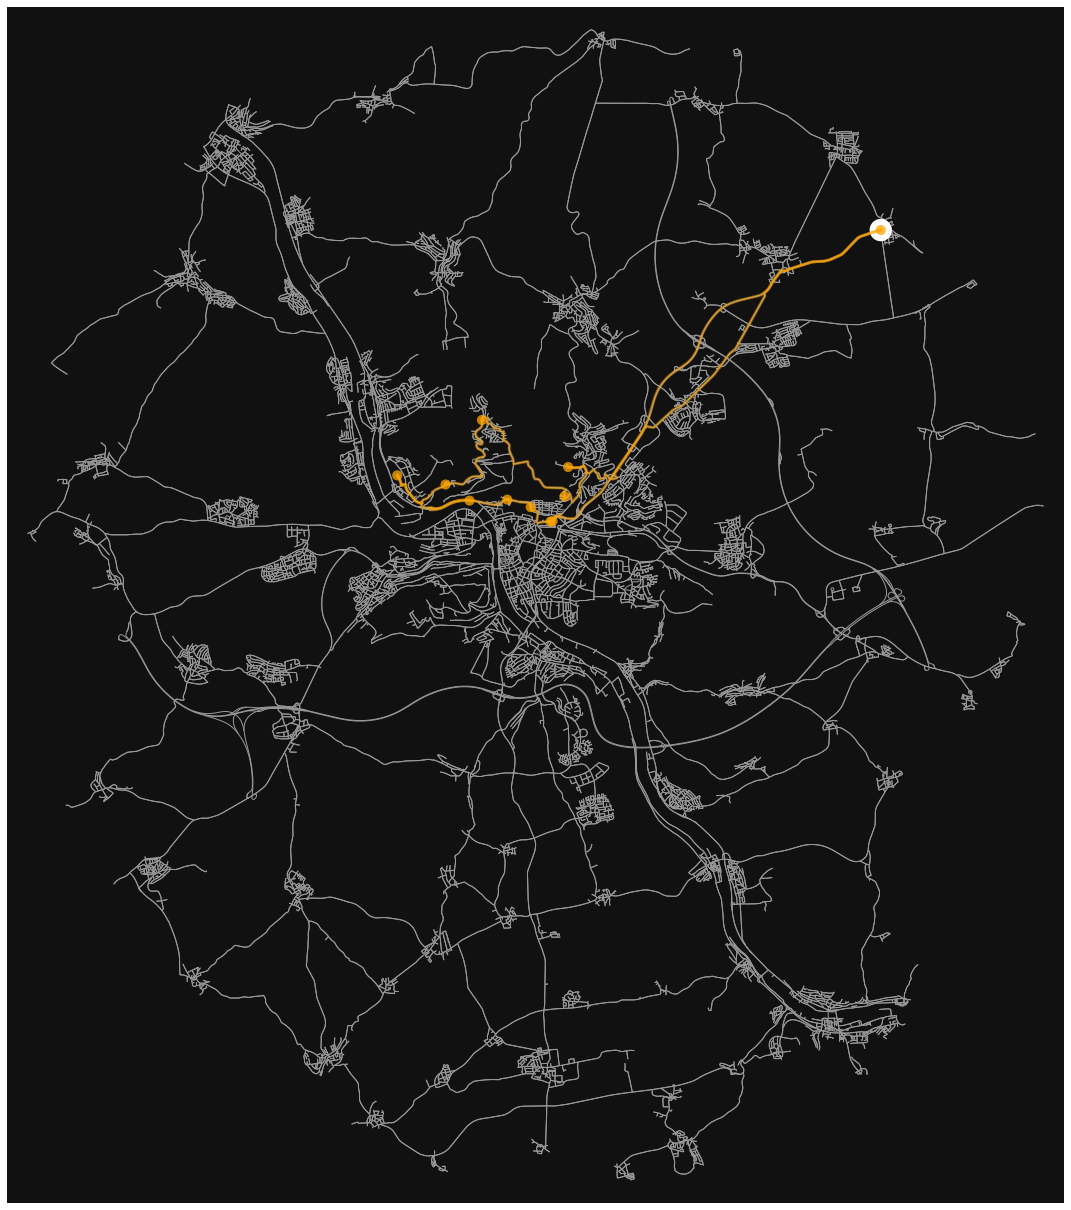

In [45]:
lpr.Route_Plot(Vehicle = "V_1")

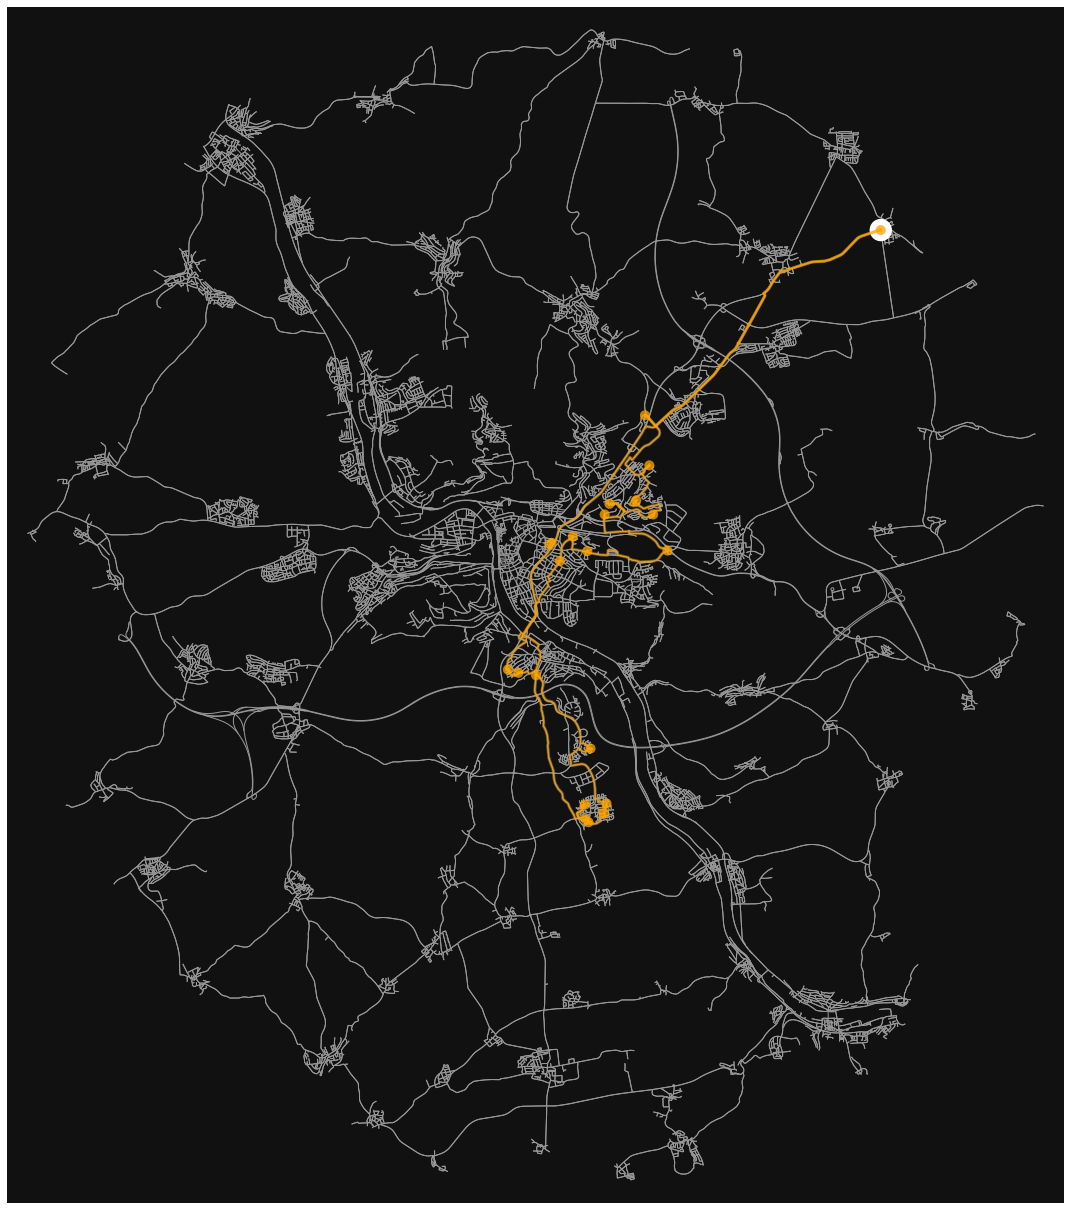

In [46]:
lpr.Route_Plot(Vehicle = "V_2")

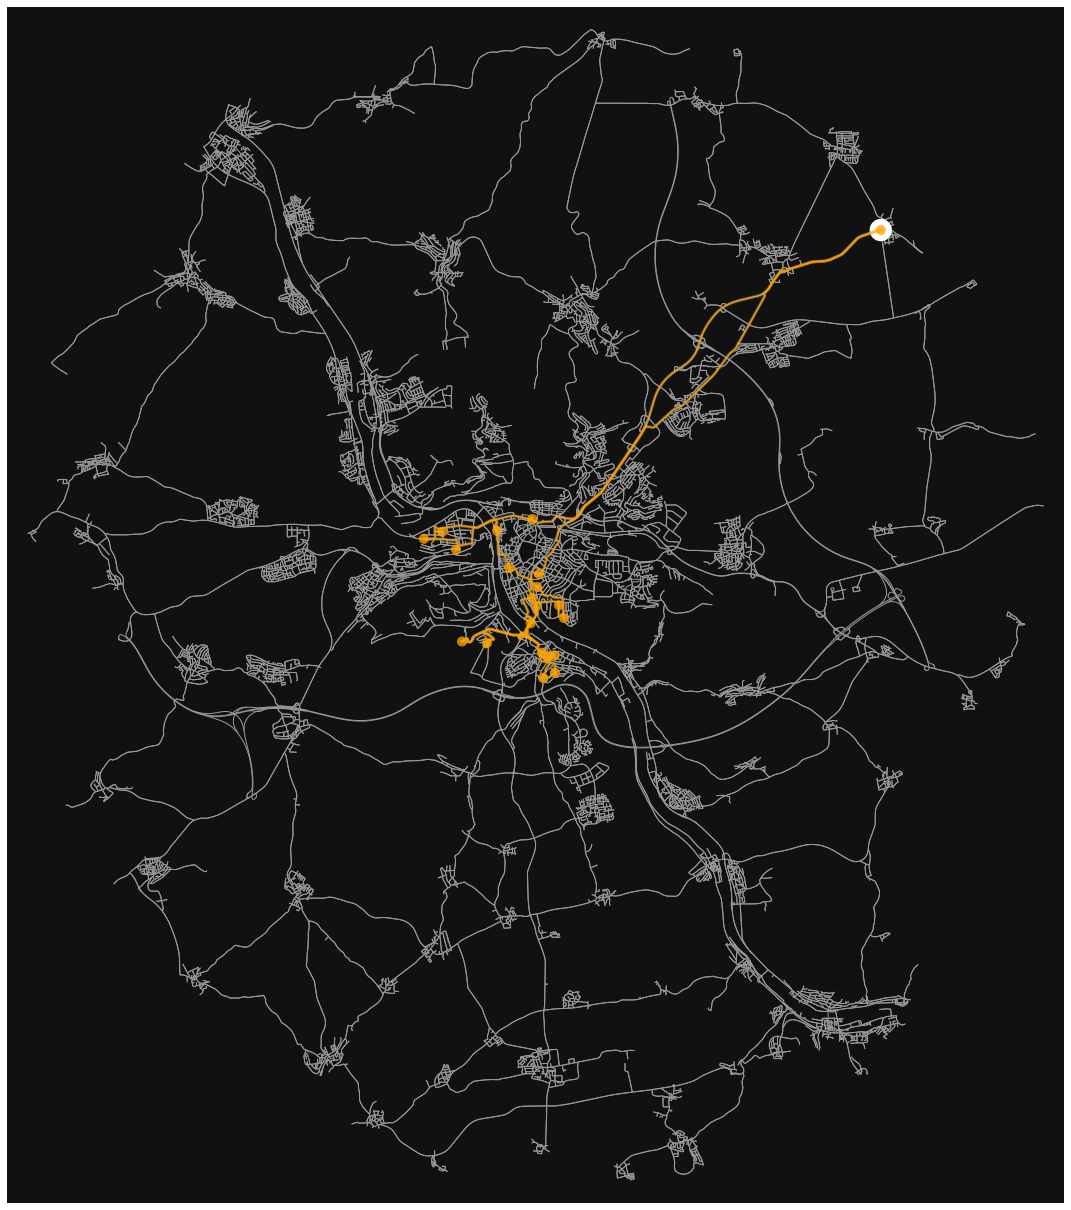

In [47]:
lpr.Route_Plot(Vehicle = "V_3")